<a href="https://colab.research.google.com/github/simranwarraich/Pharma-Price-Optimizer/blob/main/PharmaPriceOpmizationDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARE AND PROCESS

# 1. Load the Dataset from the Second Sheet
First, we'll load the dataset from the second sheet of the Excel file.

In [2]:
import pandas as pd

# Load the dataset
file_path ='/content/drive/MyDrive/Colab Notebooks/Pharm Data.xlsx'
df = pd.read_excel(file_path, sheet_name=1)

# Display the first few rows of the dataset
print(df.head())


              Distributor                         Customer Name     City  \
0  Gottlieb-Cruickshank                 Zieme, Doyle and Kunze    Lublin   
1  Gottlieb-Cruickshank                              Feest PLC   Świecie   
2  Gottlieb-Cruickshank    Medhurst-Beer Pharmaceutical Limited   Rybnik   
3  Gottlieb-Cruickshank                   Barton Ltd Pharma Plc  Czeladź   
4  Gottlieb-Cruickshank                    Keeling LLC Pharmacy  Olsztyn   

  Country  Latitude  Longitude   Channel  Sub-channel            Product Name  \
0  Poland   51.2333    22.5667  Hospital      Private              Topipizole   
1  Poland   53.4167    18.4333  Pharmacy       Retail            Choriotrisin   
2  Poland   50.0833    18.5000  Pharmacy  Institution               Acantaine   
3  Poland   50.3333    19.0833  Hospital      Private    Lioletine Refliruvax   
4  Poland   53.7800    20.4942  Pharmacy       Retail  Oxymotroban Fexoformin   

      Product Class  Quantity  Price   Sales    Month  Y

# 2. Initial Data Exploration
Next, we'll explore the dataset to understand its structure and identify any potential issues.

In [3]:
# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))


            Latitude      Longitude       Quantity          Price  \
count  254082.000000  254082.000000  254082.000000  254082.000000   
mean       50.962222      10.803212     112.872139     412.207720   
std         1.625526       4.143311     744.310385     224.963687   
min        47.514200       6.083800   -7200.000000      22.000000   
25%        49.805600       7.891100       5.000000     195.000000   
50%        51.133300       9.397800      20.000000     430.000000   
75%        52.083300      12.133300      50.000000     605.000000   
max        54.781900      23.566700  117600.000000     794.000000   

              Sales           Year  
count  2.540820e+05  254082.000000  
mean   4.643772e+04    2018.385187  
std    3.491918e+05       1.041352  
min   -4.161600e+06    2017.000000  
25%    1.704000e+03    2018.000000  
50%    5.850000e+03    2018.000000  
75%    2.156525e+04    2019.000000  
max    7.420560e+07    2020.000000  
         Distributor                 Customer

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)

# Display basic info about the dataset
print(df.info())

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64
Distributor           object
Customer Name         object
City                  object
Country               object
Latitude             float64
Longitude            float64
Channel               object
Sub-channel           object
Product Name          object
Product Class         object
Quantity             float64
Price                  int64
Sales                float64
Month                 object
Year                   int64
Name of Sales Rep     object
Manager               object
Sales Team            object
dtype: object
<class 'pandas.core.frame.DataFrame'>

# 3. Data Cleaning
We'll address any data quality issues such as missing values, duplicates, and data type mismatches.

3.1 Handle Missing Values

In [5]:
# Display rows with missing values
print(df[df.isnull().any(axis=1)]) #There are no rows with null values

Empty DataFrame
Columns: [Distributor, Customer Name, City, Country, Latitude, Longitude, Channel, Sub-channel, Product Name, Product Class, Quantity, Price, Sales, Month, Year, Name of Sales Rep, Manager, Sales Team]
Index: []


3.2 Remove Duplicates

In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True) # 4 duplicate rows dropped

3.3 Remove Potential Outliers such as negative values for quantity

In [ ]:
negative_counts = df[(df['Quantity'] < 0)].shape[0]
print(negative_counts)

In [8]:
df = df[df['Quantity'] >= 0]

# 4. Convert Data Types
Ensure columns are in the appropriate data type. For example, convert month and year to a datetime format.

In [9]:
def convert_date(row):
  return pd.to_datetime(f"{row['Year']}-{row['Month']}-01", format='%Y-%B-%d')

df['Date'] = df.apply(convert_date, axis=1)
df.drop(['Year', 'Month'], axis=1, inplace=True)

# 5. Visualize the Data
5.1 Importing Visualization Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visual style
sns.set(style='whitegrid')


5.2 Visualizing Distributions

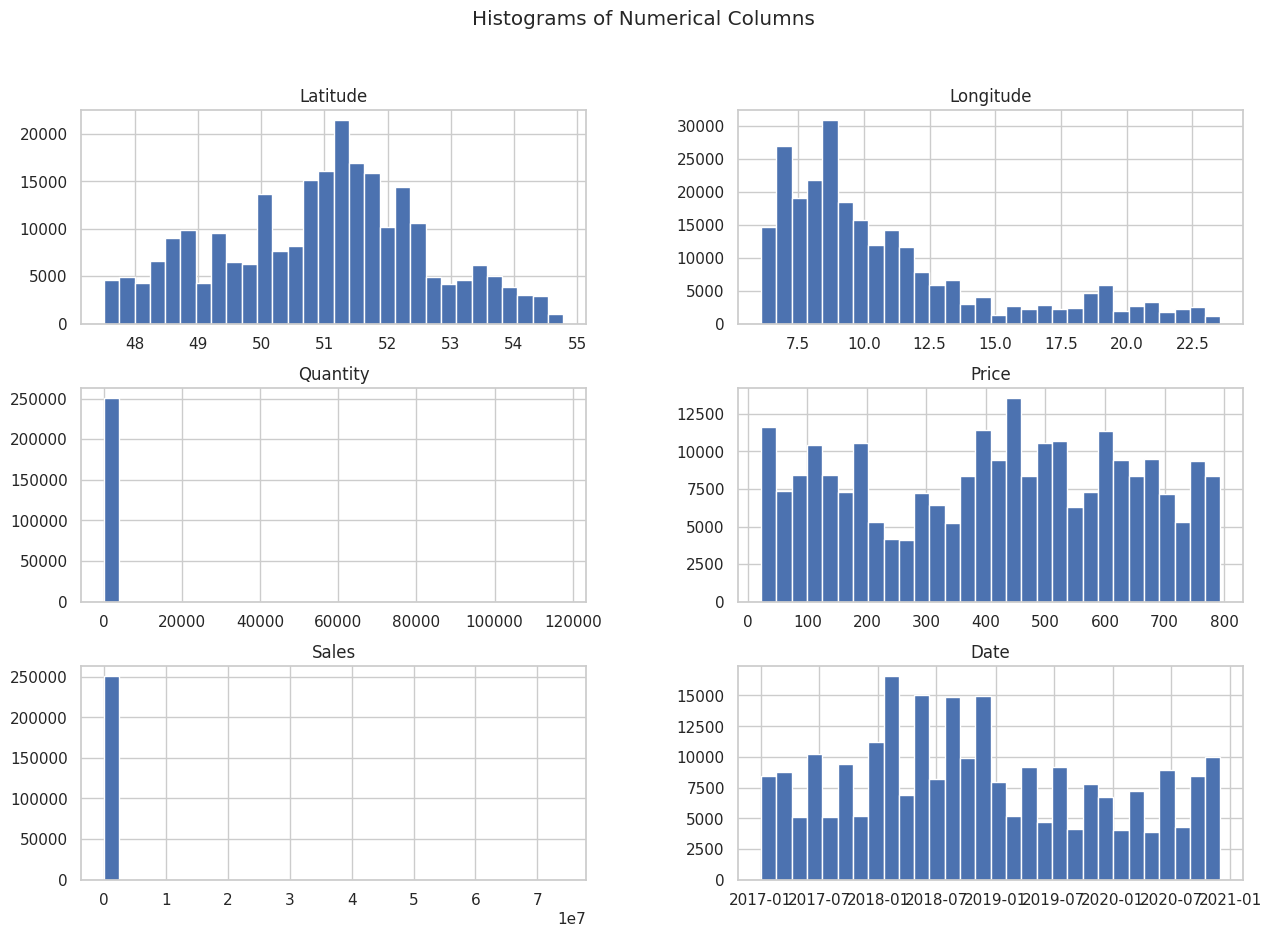

In [11]:
# Histogram for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

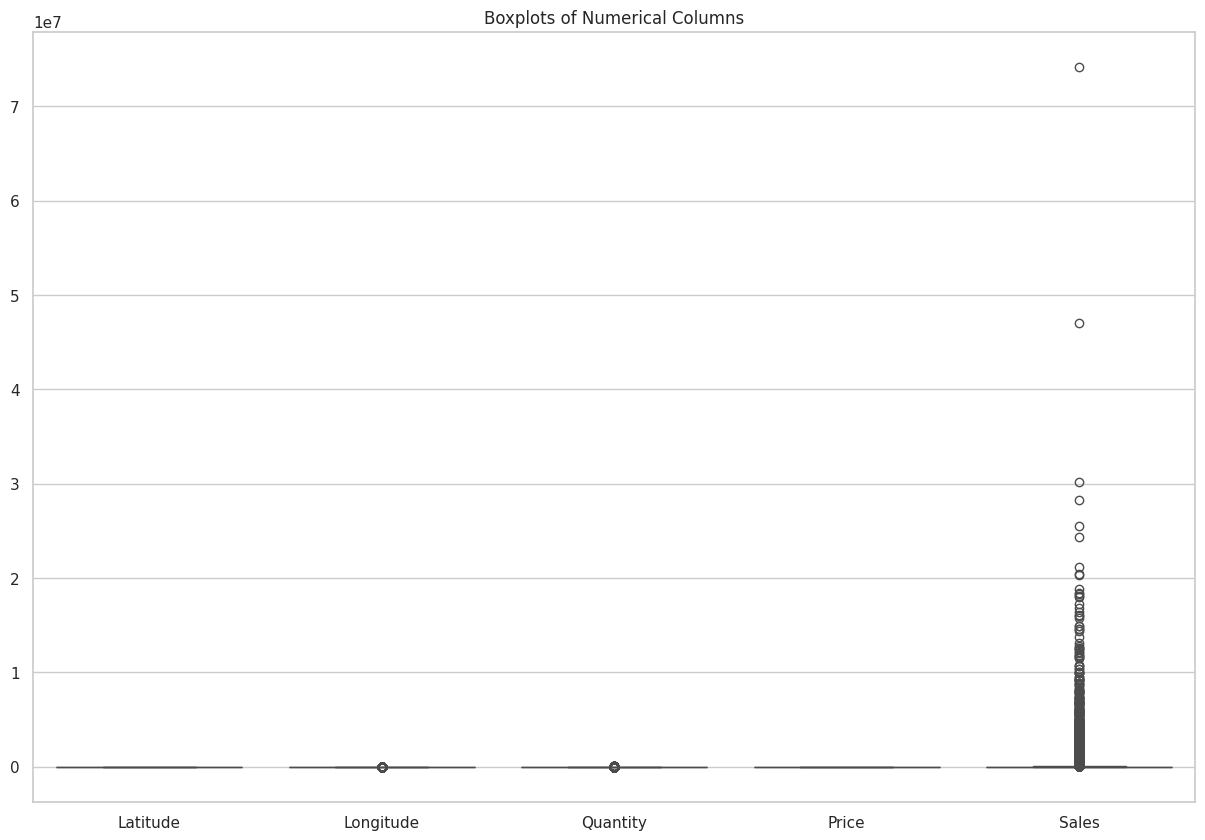

In [12]:
# Boxplots for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots of Numerical Columns')
plt.show()

5.3 Visualizing Relationships

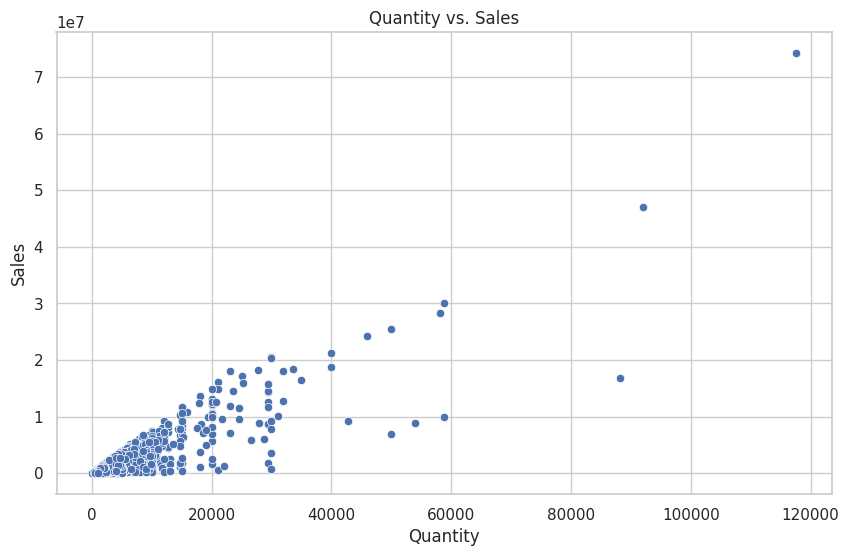

In [13]:
# Scatter plot for Quantity vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title('Quantity vs. Sales')
plt.show()

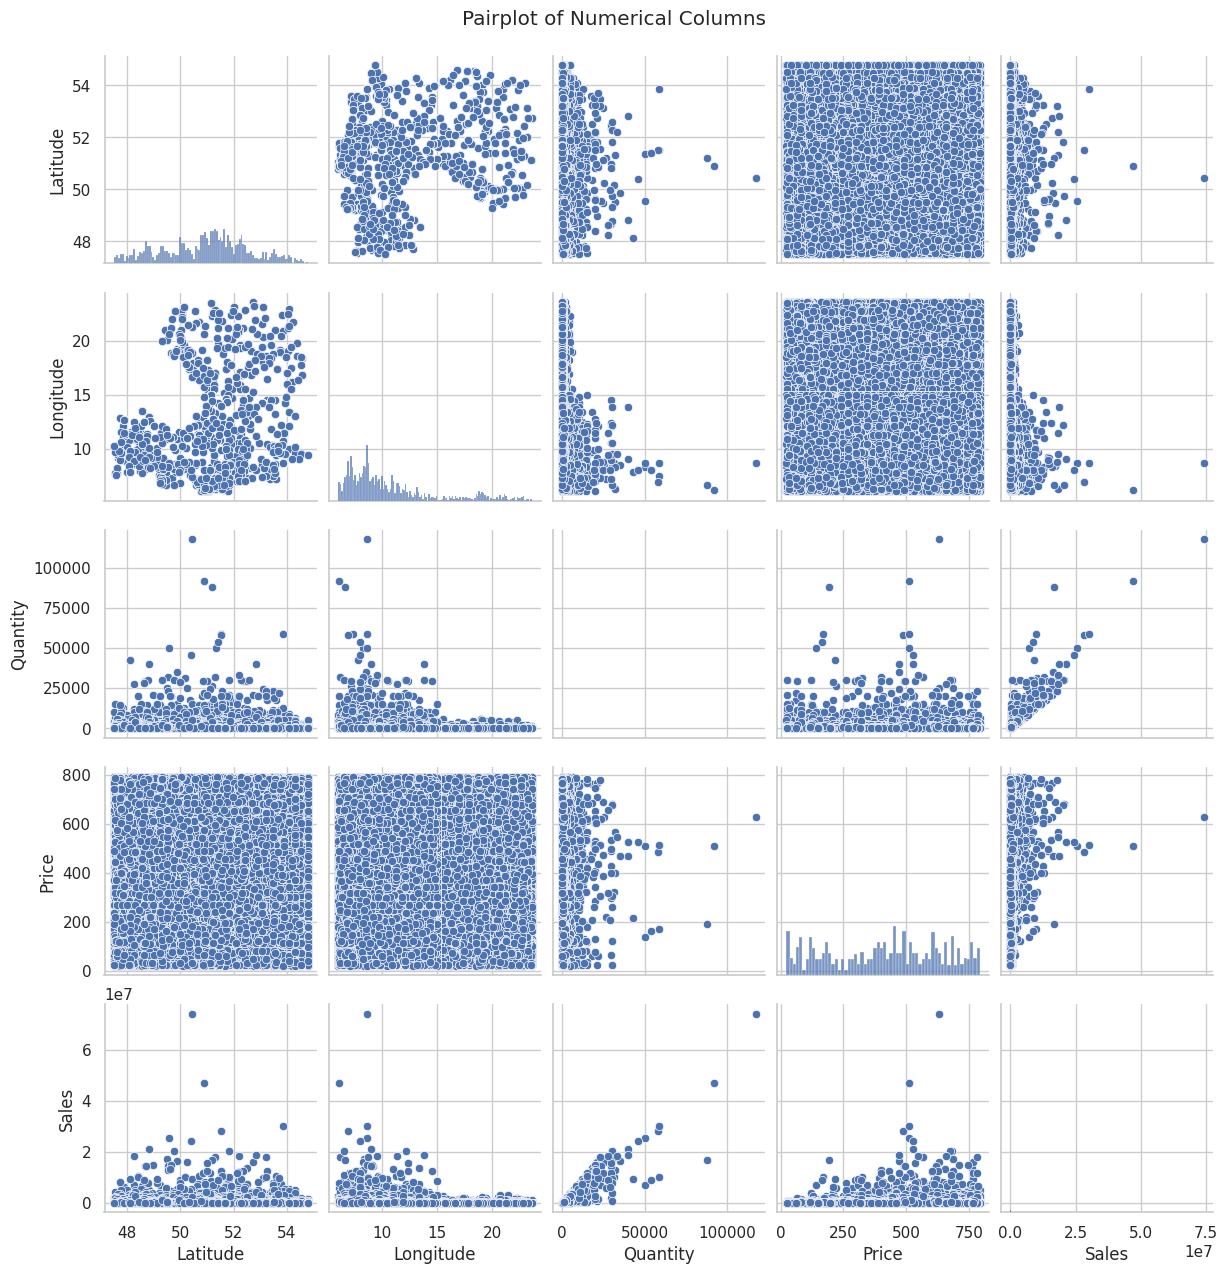

In [14]:
# Pairplot for numerical columns
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()


5.4 Visualizing Categorical Data

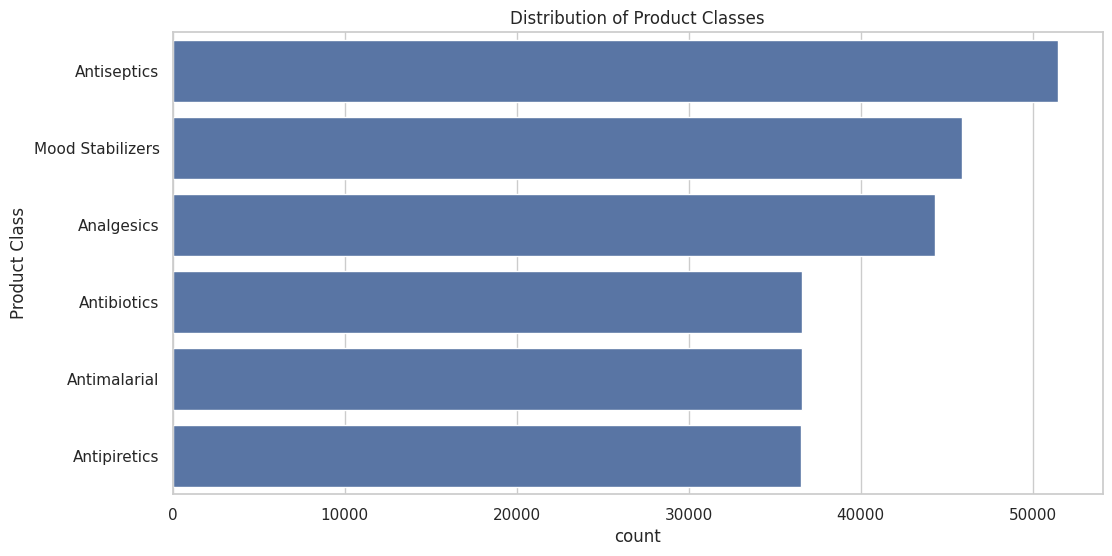

In [15]:
# Bar plot for Product Class
plt.figure(figsize=(12, 6))
sns.countplot(y='Product Class', data=df, order=df['Product Class'].value_counts().index)
plt.title('Distribution of Product Classes')
plt.show()


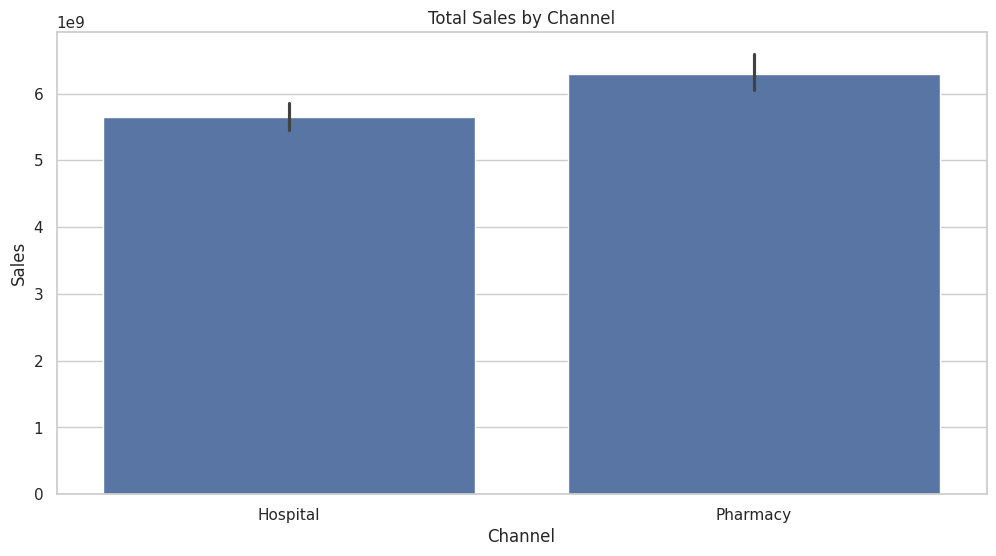

In [16]:
# Sales by Channel
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Channel')
plt.show()

# 6. Create New Features

In [17]:
# Example: Total Sales per Region (City, Country)
df['Total Sales'] = df.groupby(['City', 'Country'])['Sales'].transform('sum')

# Example: Average Price per Product
df['Average Price'] = df.groupby('Product Name')['Price'].transform('mean')

# 7. Save Cleaned Data

Save the cleaned dataset for further analysis.

In [18]:
# Save the cleaned dataset
df.to_csv('/pharma-data-cleaned.csv', index=False)

# ANALYZE



Summary of Analysis Phase:

1. Sales Trends Analysis: Examined sales over time, by product, by region.

2. Customer Segments Analysis: Identified the most valuable customer segments based on CLV.

3. Product Performance Analysis: Determined top-performing products in different regions.

4. Sales Rep Performance Analysis: Evaluated the performance of sales representatives and teams.

# 1. Analyzing Sales Trends

1.1 Sales Over Time

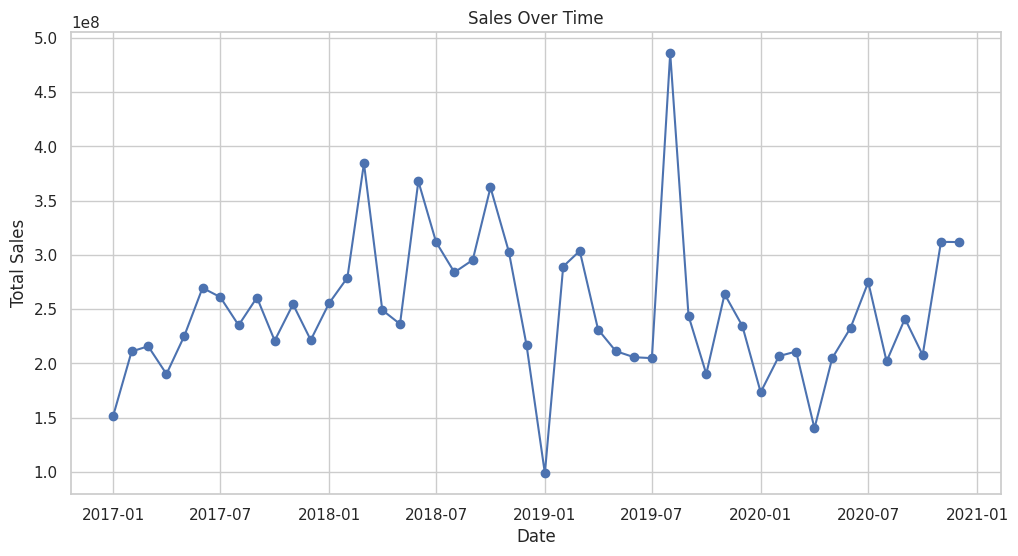

In [19]:
import matplotlib.pyplot as plt

# Aggregate sales by date
sales_over_time = df.groupby('Date')['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Sales'], marker='o')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


1.2 Sales by Product

In [20]:
# Aggregate sales by product
sales_by_product = df.groupby('Product Name')['Sales'].sum().reset_index()

In [23]:
!pip install plotly
import plotly.express as px

In [25]:
# Select the top 10 products by sales
top_products = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

# Plot the top 10 products
fig = px.bar(top_products, x='Sales', y='Product Name',
             title='Top 10 Products by Sales',
             labels={'Sales': 'Total Sales', 'Product Name': 'Product'},
             height=600)
fig.show()


1.3 Sales by Region

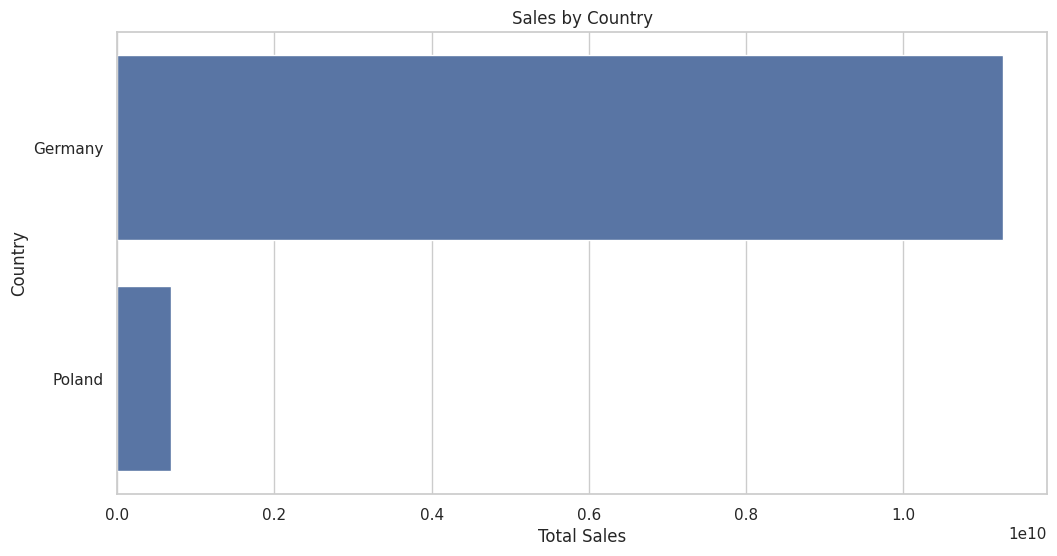

In [26]:
# Aggregate sales by country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

# Plot sales by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Country', data=sales_by_country.sort_values(by='Sales', ascending=False))
plt.title('Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


# 2. Analyzing Customer Segments
2.1 Customer Lifetime Value (CLV)

In [27]:
# Calculate CLV as total sales per customer
customer_ltv = df.groupby('Customer Name')['Sales'].sum().reset_index()
customer_ltv.columns = ['Customer Name', 'CLV']

In [28]:
# Create interactive histogram with Plotly Express
fig = px.histogram(customer_ltv, x='CLV', nbins=30, title='Customer Lifetime Value (CLV) Distribution')

# Update axis labels (optional)
fig.update_xaxes(title_text='CLV')
fig.update_yaxes(title_text='Frequency')

# Show the plot
fig.show()

In [ ]:
# Sort DataFrame by CLV in descending order (highest first)
top_n_customers = customer_ltv.sort_values(by='CLV', ascending=False).head(10)

# Print top 'n' customers with highest CLV
print(top_n_customers)


# 3. Analyzing Product Performance
3.1 Product Performance by Region

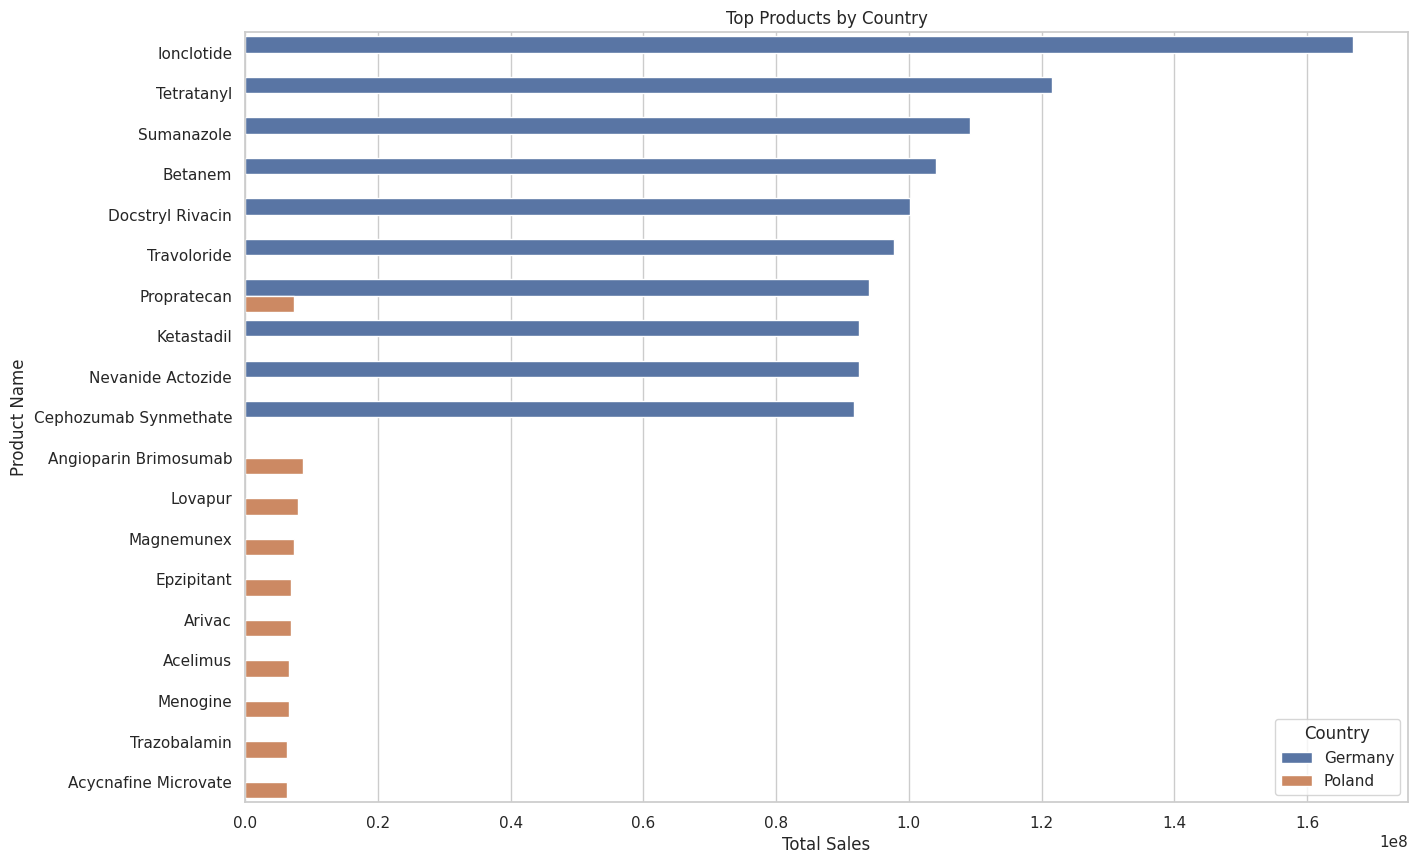

In [29]:
# Aggregate sales by product and country
product_performance = df.groupby(['Product Name', 'Country'])['Sales'].sum().reset_index()

# Plot top products by country
plt.figure(figsize=(15, 10))
top_products = product_performance.sort_values(by='Sales', ascending=False).groupby('Country').head(10)
sns.barplot(x='Sales', y='Product Name', hue='Country', data=top_products)
plt.title('Top Products by Country')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='Country')
plt.show()


# 4. Analyzing Sales Rep Performance
4.1 Sales by Sales Rep

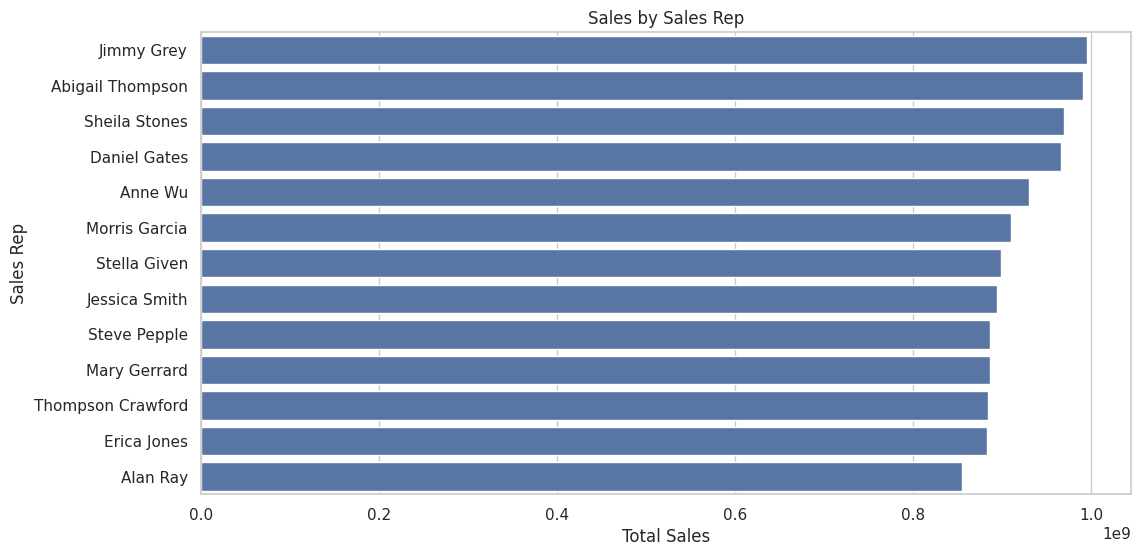

In [30]:
# Aggregate sales by sales rep
sales_by_rep = df.groupby('Name of Sales Rep')['Sales'].sum().reset_index()

# Plot sales by sales rep
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Name of Sales Rep', data=sales_by_rep.sort_values(by='Sales', ascending=False))
plt.title('Sales by Sales Rep')
plt.xlabel('Total Sales')
plt.ylabel('Sales Rep')
plt.show()


4.2 Sales by Sales Team

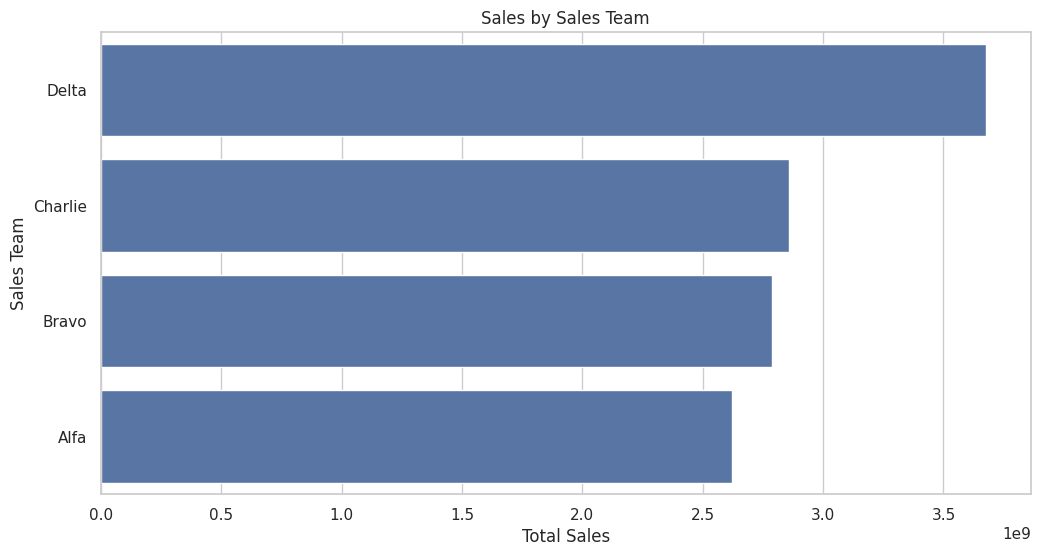

In [31]:
# Aggregate sales by sales team
sales_by_team = df.groupby('Sales Team')['Sales'].sum().reset_index()

# Plot sales by sales team
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Sales Team', data=sales_by_team.sort_values(by='Sales', ascending=False))
plt.title('Sales by Sales Team')
plt.xlabel('Total Sales')
plt.ylabel('Sales Team')
plt.show()
